In [14]:
import json

# File paths for the JSON files
file_paths = [
    "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_0_200a.json", "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_0_200b.json",
    "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_200_1000a.json", "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_200_1000b.json",
    "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_1000_2000a.json", "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_1000_2000b.json",
    "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_2000_3000.json", "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_2000_3000b.json",
    "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_3000_1.json", "/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/ads_data_3000_1b.json"
]

# List to store all the entries from each file
all_entries = []

# Load each file and extend the all_entries list with its contents
for file_path in file_paths:
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
        all_entries.extend(data)

# Check the total number of entries combined
len(all_entries)

# save the combined data to a new file
with open('/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/merged_ads_data.json', 'w', encoding='utf-8') as file:
    json.dump(all_entries, file, ensure_ascii=False, indent=4)

562

In [15]:
# total number of unique url entries
len(set([entry['url'] for entry in all_entries]))

190

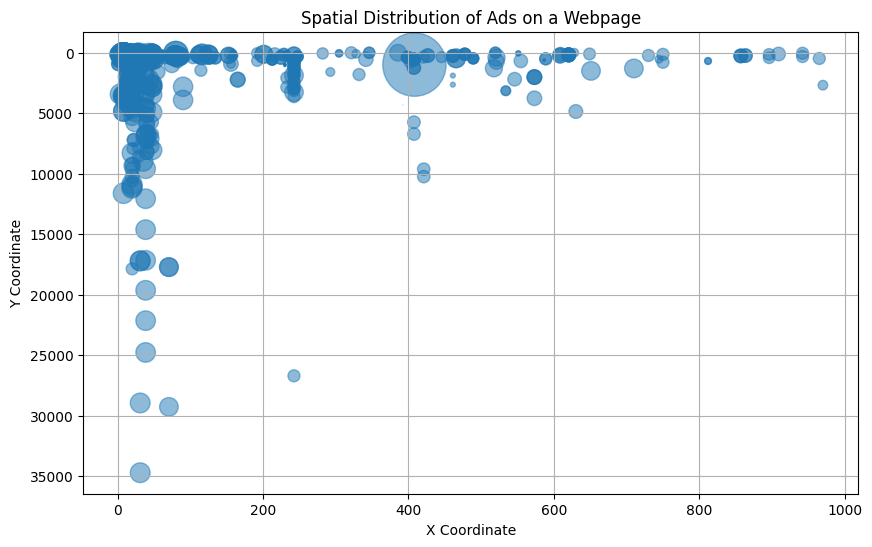

In [7]:
import matplotlib.pyplot as plt

# Load the combined JSON data for processing
with open("/Users/kaleemullahqasim/Desktop/Prof Xiu Hai Tao/data/merged_ads_data.json", "r") as file:
    ads_data = json.load(file)

# Prepare data for plotting
x_coords = [ad['x'] for ad in ads_data]
y_coords = [ad['y'] for ad in ads_data]
sizes = [(ad['width'] * ad['height']) * 0.001 for ad in ads_data]  # Scale sizes down for better visualization

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5)

# Invert the y-axis to match the top-left origin of web layouts
plt.gca().invert_yaxis()

# Labeling axes and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Spatial Distribution of Ads on a Webpage")
plt.grid(True)

# Show the plot
plt.show()


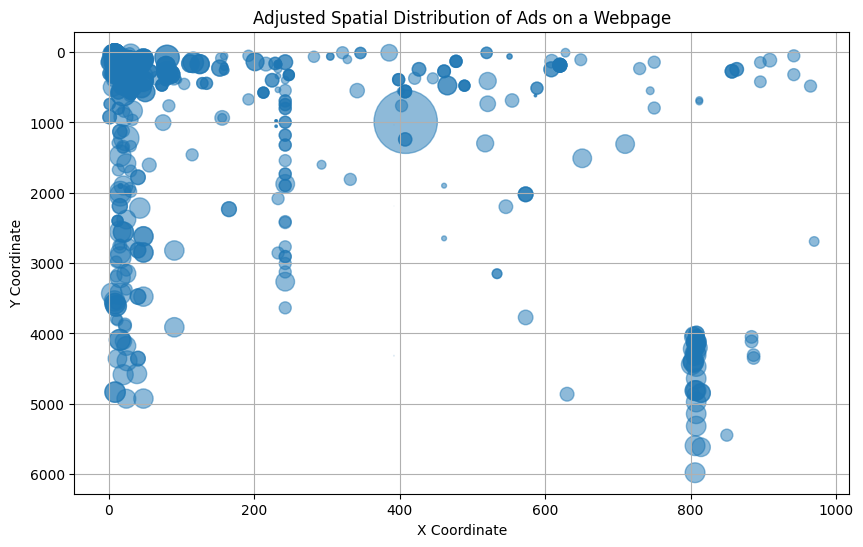

In [8]:
# Adjust the y coordinates from the range 5000-35000 to 4000-6000 and shift x coordinates to the range 800-1000

adjusted_data = []
for ad in ads_data:
    if 5000 <= ad['y'] <= 35000:
        # Scale and shift the y-coordinate
        scaled_y = 4000 + (6000 - 4000) * ((ad['y'] - 5000) / (35000 - 5000))
        ad['y'] = scaled_y
        
        # Shift the x-coordinate to between 800 and 1000
        ad['x'] = 800 + (1000 - 800) * ((ad['x'] - min(x_coords)) / (max(x_coords) - min(x_coords)))

    adjusted_data.append(ad)

# Plot the adjusted data
x_coords_adjusted = [ad['x'] for ad in adjusted_data]
y_coords_adjusted = [ad['y'] for ad in adjusted_data]
sizes_adjusted = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data]  # Scale sizes down for better visualization

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x_coords_adjusted, y_coords_adjusted, s=sizes_adjusted, alpha=0.5)

# Invert the y-axis to match the top-left origin of web layouts
plt.gca().invert_yaxis()

# Labeling axes and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Adjusted Spatial Distribution of Ads on a Webpage")
plt.grid(True)

# Show the plot
plt.show()


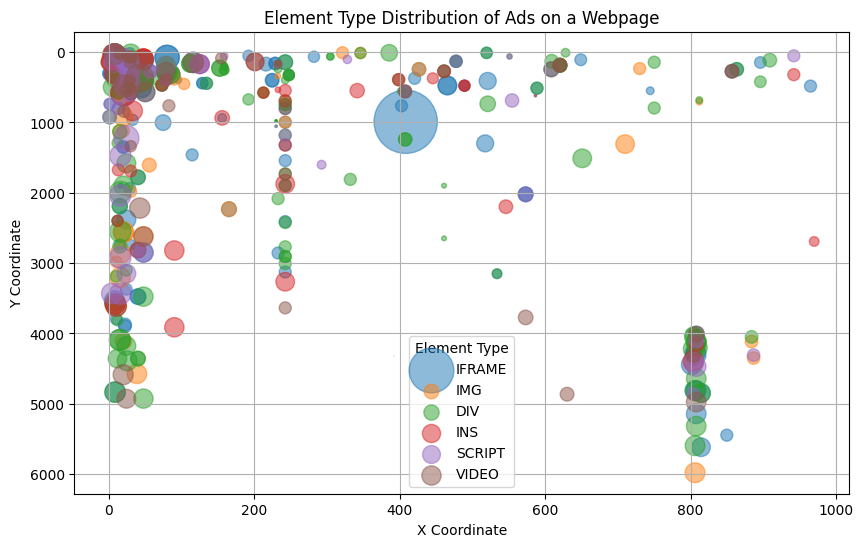

In [9]:
import random

# Define the element types and distribution ratios
element_types = ['IFRAME', 'IMG', 'DIV', 'INS', 'SCRIPT', 'VIDEO']
iframe_div_ratio = 0.65  # 65% for IFRAME and DIV
other_elements_ratio = 0.35  # 35% for IMG, INS, SCRIPT, VIDEO

# Calculate the number of points for IFRAME and DIV
num_iframe_div = int(len(adjusted_data) * iframe_div_ratio)
num_others = len(adjusted_data) - num_iframe_div

# Assign 'IFRAME' and 'DIV' to 65% of the points randomly
iframe_div_elements = ['IFRAME', 'DIV']
assigned_iframe_div = random.choices(iframe_div_elements, k=num_iframe_div)

# Assign the remaining element types to the other 35%
other_elements = ['IMG', 'INS', 'SCRIPT', 'VIDEO']
assigned_others = random.choices(other_elements, k=num_others)

# Combine the two lists and shuffle to randomize distribution
all_assigned_elements = assigned_iframe_div + assigned_others
random.shuffle(all_assigned_elements)

# Add the element type to each ad entry in adjusted_data
for ad, element in zip(adjusted_data, all_assigned_elements):
    ad['element_type'] = element

# Plot the adjusted data with different colors for different elements
plt.figure(figsize=(10, 6))

# Group data by element type to color them differently
for element in element_types:
    x_coords = [ad['x'] for ad in adjusted_data if ad['element_type'] == element]
    y_coords = [ad['y'] for ad in adjusted_data if ad['element_type'] == element]
    sizes = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data if ad['element_type'] == element]
    plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, label=element)

# Invert the y-axis, add labels, legends, and title
plt.gca().invert_yaxis()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
# plt.title("Element Type Distribution of Ads on a Webpage")
plt.legend(title='Element Type')
plt.grid(True)

# Show the plot
plt.show()


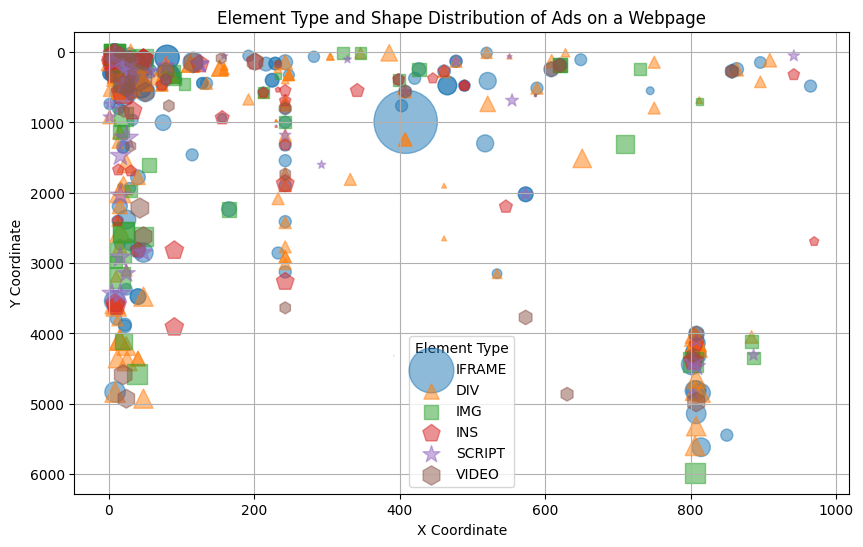

In [10]:
# Define markers for each element type to differentiate by shape as well
markers = {
    'IFRAME': 'o',  # circle
    'DIV': '^',  # triangle up
    'IMG': 's',  # square
    'INS': 'p',  # pentagon
    'SCRIPT': '*',  # star
    'VIDEO': 'h'   # hexagon
}

# Re-create the plot with different shapes and colors for each element type
plt.figure(figsize=(10, 6))

# Group data by element type to plot them with different markers and colors
for element, marker in markers.items():
    x_coords = [ad['x'] for ad in adjusted_data if ad['element_type'] == element]
    y_coords = [ad['y'] for ad in adjusted_data if ad['element_type'] == element]
    sizes = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data if ad['element_type'] == element]
    plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, label=element, marker=marker)

# Invert the y-axis, add labels, legends, and title
plt.gca().invert_yaxis()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Element Type and Shape Distribution of Ads on a Webpage")
plt.legend(title='Element Type')
plt.grid(True)

# Show the plot
plt.show()


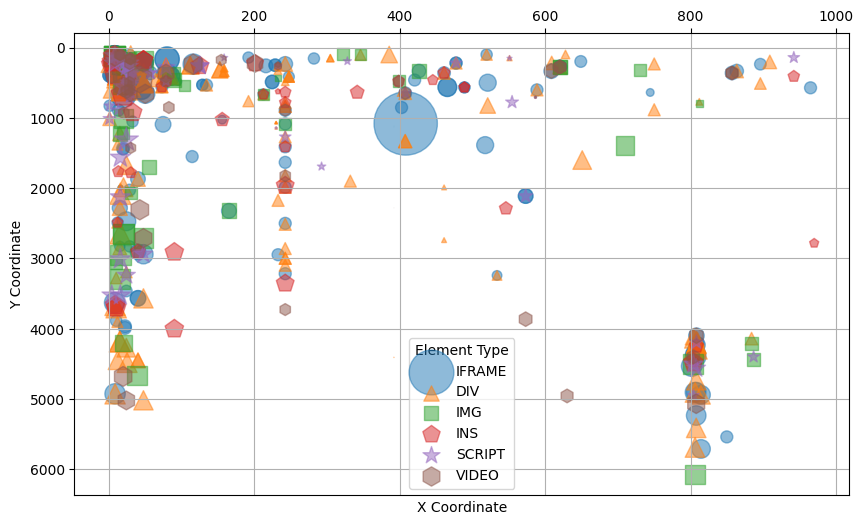

In [32]:
# Apply a uniform shift downward to ensure no points touch or go below zero on the y-axis
shift_y = 10  # Adding a buffer of 10 units to each y-coordinate

for ad in adjusted_data:
    ad['y'] += shift_y

# Re-plot to verify the adjustment
plt.figure(figsize=(10, 6))
for element, marker in markers.items():
    x_coords = [ad['x'] for ad in adjusted_data if ad['element_type'] == element]
    y_coords = [ad['y'] for ad in adjusted_data if ad['element_type'] == element]
    sizes = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data if ad['element_type'] == element]
    plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, label=element, marker=marker)

plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
# plt.title("Further Adjusted for Clarity: Distribution of Ads on a Webpage")
plt.legend(title='Element Type')
plt.grid(True)
plt.show()


/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_83211/1201819440.py:19: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


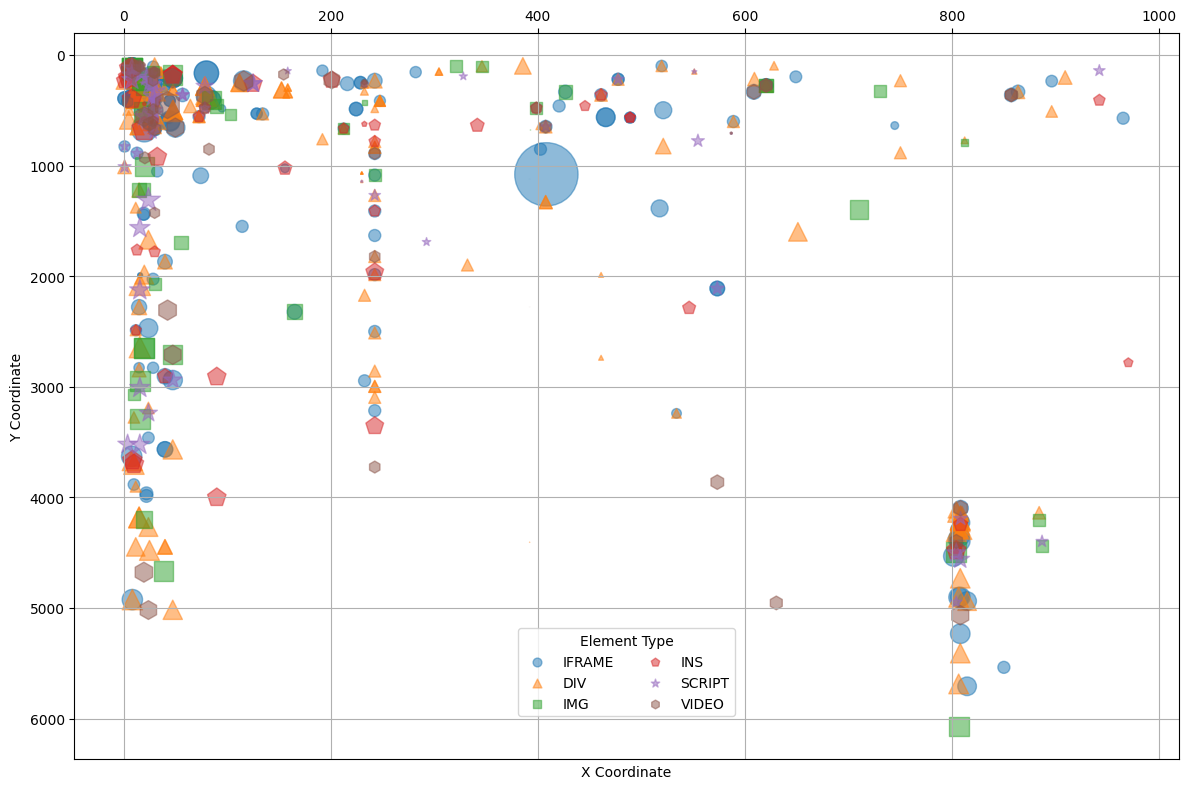

In [34]:
# Plot with the legend outside the graph and uniform legend marker sizes

plt.figure(figsize=(12, 8))
for element, marker in markers.items():
    x_coords = [ad['x'] for ad in adjusted_data if ad['element_type'] == element]
    y_coords = [ad['y'] for ad in adjusted_data if ad['element_type'] == element]
    sizes = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data if ad['element_type'] == element]
    scatter = plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, label=element, marker=marker)

plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
# plt.title("Distribution of Ads")
plt.grid(True)

# Adjust the legend to be outside the plot, with uniform marker sizes
legend = plt.legend(title='Element Type', loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2)
for handle in legend.legendHandles:
    handle.set_sizes([40.0])


plt.tight_layout()  # Adjust layout to make room for legend outside the plot
plt.show()


/var/folders/12/_5rp17tj7219kynlpzrhsmjw0000gn/T/ipykernel_83211/4057920763.py:17: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


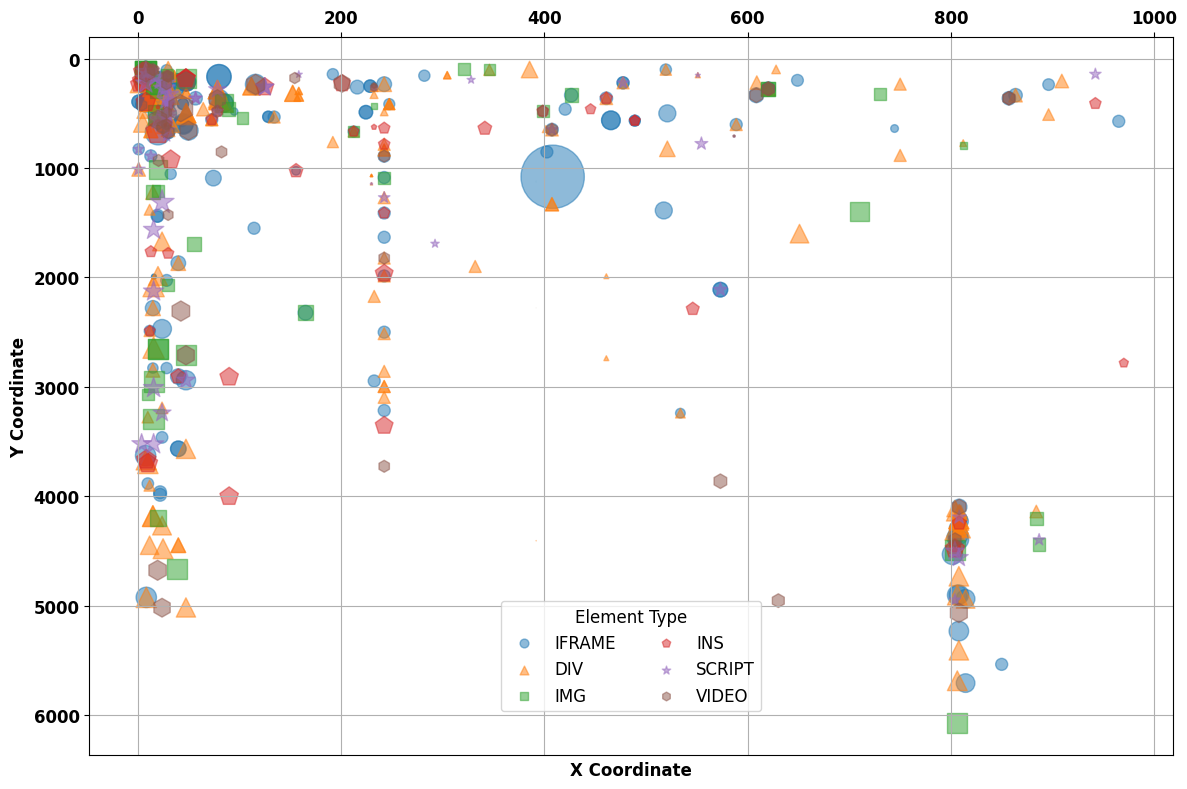

In [39]:
plt.figure(figsize=(12, 8))
for element, marker in markers.items():
    x_coords = [ad['x'] for ad in adjusted_data if ad['element_type'] == element]
    y_coords = [ad['y'] for ad in adjusted_data if ad['element_type'] == element]
    sizes = [(ad['width'] * ad['height']) * 0.001 for ad in adjusted_data if ad['element_type'] == element]
    scatter = plt.scatter(x_coords, y_coords, s=sizes, alpha=0.5, label=element, marker=marker)

plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()
plt.xlabel("X Coordinate", fontsize=12, fontweight='bold')
plt.ylabel("Y Coordinate", fontsize=12, fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.grid(True)

legend = plt.legend(title='Element Type', loc='lower center', bbox_to_anchor=(0.5, 0.05), ncol=2, title_fontsize='large', fontsize='large')
for handle in legend.legendHandles:
    handle.set_sizes([40.0])

plt.tight_layout()
plt.show()
